<a href="https://colab.research.google.com/github/OSegun/Zummit-Africa-ML-AL-Projects/blob/main/Red_Wine_Dataset_Comparison_With_RFC_SVM_KNN_DTC_NB_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification Model Comparison with Red Wine Dataset

The red wine dataset is a variants of the Portuguese "Vinho Verde" wine. The project is aimed at testing for the quality of the wine by comparing classification models and check for the best of accuracy, using:

- Random Forest Classifier
- Support Vector Machines (SVMs)
- KNeighborsClassifier (KNN)
- Decision Tree Classifier
- Naive Bayes

The following features are used in building this models:

- Fixed acidity
- Volatile acidity
- Citric acid
- Residual sugar
- Chlorides
- Free sulfur dioxide
- Total sulfur dioxide
- Density
- pH
- Sulphates
- Alcohol
- Quality Output variable (based on sensory data)

The Dataset can be downloaded from kaggle website https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009 

In [1]:

# Importing all necessary libaries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
wine_dataset = pd.read_csv('/content/winequality-red.csv') # reading the dataset to pandas

In [ ]:
wine_dataset.shape # Number of Observation & Features

(1599, 12)

In [ ]:
wine_dataset.head() # Display the first few roles of the dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
wine_dataset.isnull().sum() # Checking for missing values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


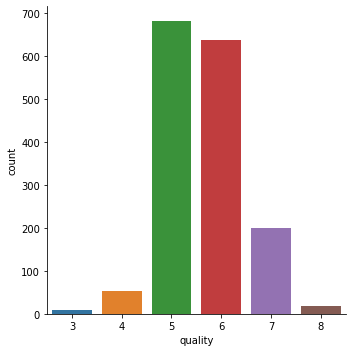

In [ ]:
sns.catplot(x='quality', data = wine_dataset, kind = 'count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

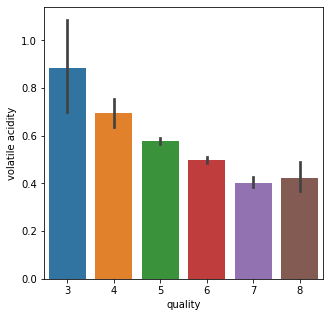

In [ ]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'volatile acidity', data = wine_dataset)

<Axes: xlabel='quality', ylabel='citric acid'>

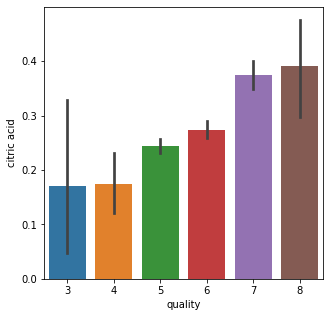

In [ ]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'citric acid', data = wine_dataset)

In [ ]:
correlation = wine_dataset.corr()

<Axes: >

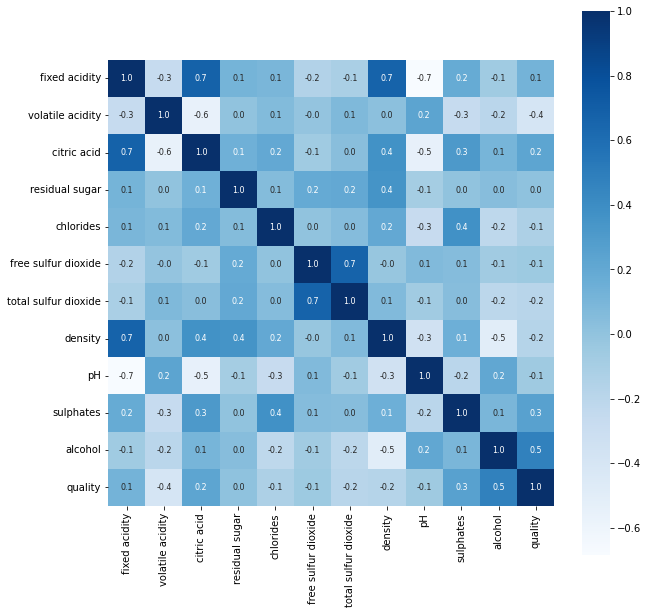

In [ ]:
plt.figure(figsize=(10,10)) # Ploting the correlation of the features to one another
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [ ]:
# Spliting the dataset into input and ouput or features and target
X = np.asarray(wine_dataset.drop('quality', axis=1)) # Features

In [ ]:
Y = np.asarray(wine_dataset['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)) # Target

In [ ]:
print(X)
print(Y)

[[ 7.4    0.7    0.    ...  3.51   0.56   9.4  ]
 [ 7.8    0.88   0.    ...  3.2    0.68   9.8  ]
 [ 7.8    0.76   0.04  ...  3.26   0.65   9.8  ]
 ...
 [ 6.3    0.51   0.13  ...  3.42   0.75  11.   ]
 [ 5.9    0.645  0.12  ...  3.57   0.71  10.2  ]
 [ 6.     0.31   0.47  ...  3.39   0.66  11.   ]]
[0 0 0 ... 0 0 0]


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2) # Spliting the features and target into 80% train and 20% test 

In [ ]:
rmodel = RandomForestClassifier()
# Instantiating and fitting the Random Forest Classifier

In [ ]:
rmodel.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
X_test_prediction = rmodel.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy Score of the test data : ', test_data_accuracy)

Accuracy Score of the test data :  0.934375


In [ ]:
classifier = svm.SVC(kernel='linear')
# Instantiating and fitting the Support Vector Machines
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [ ]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy Score of the training data : ', training_data_accuracy)

Accuracy Score of the training data :  0.8647380766223612


In [ ]:
for i in range(1, 6): # Checking for the accuracy of the KNeighborsClassifier with different number of n_neighbors.
    model = KNeighborsClassifier(n_neighbors = i) # Instantiating and fitting the KNeighborsClassifier
    model.fit(X_train, Y_train)
    accuracy = model.score(X_test, Y_test)
    print(f"The k-NN classifier trained with k = {i} has an accuracy of {accuracy*100:.2f}%") # From the output the n_neighbors number 1 & 5 provide us with a good accuracy of 88% which is quite stable

The k-NN classifier trained with k = 1 has an accuracy of 88.12%
The k-NN classifier trained with k = 2 has an accuracy of 88.44%
The k-NN classifier trained with k = 3 has an accuracy of 87.19%
The k-NN classifier trained with k = 4 has an accuracy of 86.88%
The k-NN classifier trained with k = 5 has an accuracy of 88.12%


In [ ]:
# Instantiating and fitting the Decision Tree Classifier

model_class = DecisionTreeClassifier(max_depth = 3) # To avoid overfitting, we set a "max_depth" of 3 so that the Tree only has 3 levels.

model_class.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
y_pred = model_class.predict(X_test)

print("Accuracy:", round(accuracy_score(Y_test,y_pred), 2))

Accuracy: 0.83


In [ ]:
gnb_model = GaussianNB()
# Instantiating and fitting the Naive Bayes
gnb_model.fit(X_train, Y_train)

GaussianNB()

In [ ]:
y_pred = gnb_model.predict(X_test)

accuracy = gnb_model.score(X_test, Y_test)

In [ ]:
print("Accuracy:", accuracy)

Accuracy: 0.83125


## Conclusion

From the models above the Random Forest Classifier provides us with the best accuracy model of 93%